In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [23]:
%matplotlib inline

### 1. Cosenos

In [64]:
T=(2*np.pi)
N=20

#Data
h=T/N #length of intervals
def yfun(t):
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)
    #yt=100*np.cos(t)
    return yt
tk=np.array([k*h for k in range(0,N)])
yk=np.array([yfun(k*h) for k in range(0,N)])
def plot_signal():
    plt.figure(figsize=(5,4))
    plt.plot(tk,yk,'-b',label='Señal de entrada')
    plt.legend(loc='upper right')
    plt.savefig('Inputsignal.png',dpi=300)

    
#DFT
s=1/h #sampling rate
def Yfun(n):
    h=T/N
    suma=0
    for k in range(1,N+1):
        yk=yfun(k*h)
        suma+=yk*np.e**((-2*np.pi*1j*k*n)/N)/np.sqrt(2*np.pi)
    return suma
Yn=np.array([Yfun(n) for n in range(0,int(N/2)+1)])
w1=2*np.pi/T
wn=np.array([n*w1 for n in range(0,int(N/2)+1)])

#IDFT
def yrfun(t):
    suma=0
    for n in range(1,int(N/2)+1):
        wn=n*w1
        suma+=2*np.pi/T*np.e**(1j*wn*t)/np.sqrt(2*np.pi)*Yfun(n)*h*2
    return suma
tt=np.linspace(0,T,400)
yy=np.array([yrfun(tm) for tm in tt])

#Plot
def plot_transformadas():
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(wn,Yn.real,'-b',label='Parte real')
    plt.plot(wn,Yn.imag,'-',color='orange',label='Parte imaginaria')
    plt.legend(loc='upper right')
    plt.title('Transformada de Fourier Discreta',fontsize=14)
    plt.ylabel('$Y(\omega_n)$',fontsize=14)
    plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(122)
    plt.plot(tt,yy.real,'-b',label='Señal recuperada')
    plt.plot(tk,yk,'or',markersize=4,label='Señal de entrada')
    plt.plot(tt,yfun(tt),'-g',label='Señal real',linewidth=0.6)
    plt.title('Transformada de Fourier Discreta Inversa',fontsize=14)
    plt.ylabel('$y(t)$',fontsize=14)
    plt.xlabel('$t$ [s]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper right')
    plt.savefig('dft_idft.png',dpi=300)
    plt.show()
    print('T = %.2f [s], N = %.2f, entonces s=%.3f [Hz]'%(T,N,N/T))
    
def plot_comparison():
    plt.figure(figsize=(5,5))
    plt.plot(wn,h*Yn.real,'-b',label='Transformada Discreta')
    ll=np.sqrt(2*np.pi)/2
    ta=np.array([0, 1, 1,    1, 3, 3,    3, 7, 7,    7, 10])
    Ya=np.array([0, 0, 3*ll, 0, 0, 5*ll, 0, 0, 8*ll, 0, 0])
    plt.plot(ta,Ya,'-r',label='Transformada Analitíca',alpha=1)
    plt.ylim(-0.2,11.5)
    plt.legend(loc='upper right')
    plt.title('Transformada de Fourier Discreta vs Analítica',fontsize=14)
    plt.ylabel('$\operatorname{Re}\{Y(\omega_n)\}$',fontsize=14)
    plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig('comparison_discrete_analytic.png',dpi=300)
    plt.show()

def plot_diracs(xdata,ydata):    
    m=max(ydata)
    lx=[]; ly=[]
    px=[]; py=[]
    for i,y in enumerate(ydata):
        if abs(y)>m/100:
            lx.append(xdata[i])
            lx.append(xdata[i])
            lx.append(xdata[i])
            ly.append(0)
            ly.append(y)
            ly.append(0)
            px.append(xdata[i])
            py.append(y)
        else:
            lx.append(xdata[i])
            ly.append(y)
    data={'x':lx,'y':ly,'px':px,'py':py}
    return data
def plot_spectrum():
    plt.figure(figsize=(5.5,4))
    #plt.plot(wn,abs(h*Yn)**2,'-b')
    ww=np.arange(0,11,1)
    YY=np.zeros(11)
    Amplitudes=[3,5,8]
    Omegas=[1,3,7]
    for w1 in ww:
        if w1 in Omegas:
            YY[int(w1)]=(np.sqrt(2*np.pi)/2*Amplitudes[Omegas.index(w1)])**2
    data=plot_diracs(ww,YY)
    plt.plot(data['x'],data['y'],color='red',label='Caso analítico',linewidth=1.6,alpha=0.8)
    plt.plot(data['px'],data['py'],'or',markersize=15)
    ii = wn<=10
    data=plot_diracs(wn[ii],abs(h*Yn[ii])**2)
    plt.plot(data['x'],data['y'],color='blue',label='Caso discreto',linewidth=1.3,alpha=0.7)
    plt.plot(data['px'],data['py'],'ob',markersize=10,alpha=0.7)
    plt.title('Espectro de potencias $y_1(t)$')
    plt.xlabel('Frecuencia $\omega$ [Hz]')
    plt.ylabel('Potencia $|Y(\omega)|^2$')
    plt.xticks([i for i in range(0,11)],fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.savefig('power_spectrum1.png',dpi=300)
    plt.show()

In [65]:
#plot_signal()

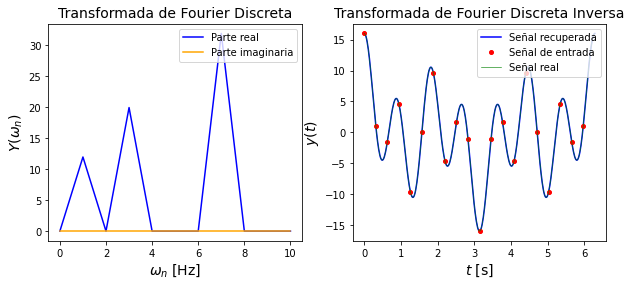

T = 6.28 [s], N = 20.00, entonces s=3.183 [Hz]


In [66]:
plot_transformadas()

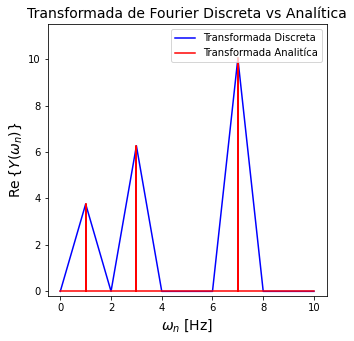

In [67]:
plot_comparison()

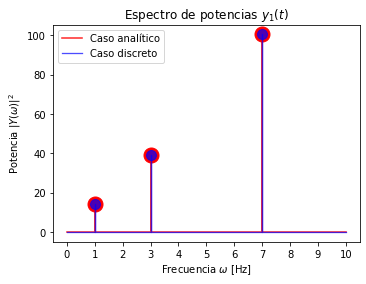

In [14]:
plot_spectrum()

### 2. Senos

In [68]:
T=2*np.pi
N=20

#Data
h=T/N #length of intervals
def yfun(t):
    yt = 3*np.sin(t)+2*np.sin(3*t)+3*np.sin(8*t)
    #yt=100*np.cos(t)
    return yt
tk=np.array([k*h for k in range(0,N)])
yk=np.array([yfun(k*h) for k in range(0,N)])
def plot_signals():
    plt.figure(figsize=(5,4))
    plt.plot(tk,yk,'-b',label='Señal de entrada')
    plt.legend(loc='upper right')
    plt.savefig('Inputsignal_sin.png',dpi=300)

#DFT
s=1/h #sampling rate
def Yfun(n):
    h=T/N
    suma=0
    for k in range(1,N+1):
        yk=yfun(k*h)
        suma+=yk*np.e**((-2*np.pi*1j*k*n)/N)/np.sqrt(2*np.pi)
    return suma
Yn=np.array([Yfun(n) for n in range(0,int(N/2)+1)])
w1=2*np.pi/T
wn=np.array([n*w1 for n in range(0,int(N/2)+1)])

#IDFT
def yrfun(t):
    suma=0
    for n in range(1,int(N/2)+1):
        wn=n*w1
        suma+=2*np.pi/T*np.e**(1j*wn*t)/np.sqrt(2*np.pi)*Yfun(n)*h*2
    return suma
tt=np.linspace(0,T,400)
yy=np.array([yrfun(tm) for tm in tt])

def plot_transformadas():
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(wn,Yn.real,'-b',label='Parte real')
    plt.plot(wn,Yn.imag,'-',color='orange',label='Parte imaginaria')
    plt.legend(loc='upper right')
    plt.title('Transformada de Fourier Discreta',fontsize=14)
    plt.ylabel('$Y_n$',fontsize=14)
    plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(122)
    plt.plot(tt,yy.real,'-b',label='Señal recuperada')
    plt.plot(tk,yk,'or',markersize=4,label='Señal de entrada')
    plt.plot(tt,yfun(tt),'-g',label='Señal real',linewidth=0.6)
    plt.title('Transformada de Fourier Discreta Inversa',fontsize=14)
    plt.ylabel('$y(t)$',fontsize=14)
    plt.xlabel('$t$ [s]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper right')
    plt.savefig('dft_idft_sin.png',dpi=300)
    plt.show()
    print('T = %.2f [s], N = %.2f, entonces s=%.3f [Hz]'%(T,N,N/T))

def plot_comparison():
    plt.figure(figsize=(6,5))
    plt.plot(wn,h*Yn.imag,'-b',label='Transformada Discreta')
    ll=np.sqrt(2*np.pi)/2
    ta=np.array([0, 1,  1,    1, 3,  3,    3, 8,  8,    8, 10])
    Ya=np.array([0, 0, -3*ll, 0, 0, -2*ll, 0, 0, -3*ll, 0, 0])
    plt.plot(ta,Ya,'-r',label='Transformada Analitíca',alpha=1)
    plt.ylim(-4.5,0.25)
    plt.legend(loc='lower right',ncol=2)
    plt.title('Transformada de Fourier Discreta vs Analítica',fontsize=14)
    plt.ylabel('$\operatorname{Im}\{Y(\omega_n)\}$',fontsize=14)
    plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig('comparison_discrete_analytic2.png',dpi=300)
    plt.show()
    
def plot_spectrum():
    plt.figure(figsize=(5.5,4))
    #plt.plot(wn,abs(h*Yn)**2,'-b')
    ww=np.arange(0,11,1)
    YY=np.zeros(11)
    Amplitudes=[3,2,3]
    Omegas=[1,3,8]
    for w1 in ww:
        if w1 in Omegas:
            YY[int(w1)]=(np.sqrt(2*np.pi)/2*Amplitudes[Omegas.index(w1)])**2
    data=plot_diracs(ww,YY)
    plt.plot(data['x'],data['y'],color='red',label='Caso analítico',linewidth=1.6,alpha=0.8)
    plt.plot(data['px'],data['py'],'or',markersize=15)
    ii = wn<=10
    data=plot_diracs(wn[ii],abs(h*Yn[ii])**2)
    plt.plot(data['x'],data['y'],color='blue',label='Caso discreto',linewidth=1.3,alpha=0.7)
    plt.plot(data['px'],data['py'],'ob',markersize=10,alpha=0.7)
    plt.title('Espectro de potencias $y_2(t)$')
    plt.xlabel('Frecuencia $\omega$ [Hz]')
    plt.ylabel('Potencia $|Y(\omega)|^2$')
    plt.xticks([i for i in range(0,11)],fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.savefig('power_spectrum2.png',dpi=300)
    plt.show()

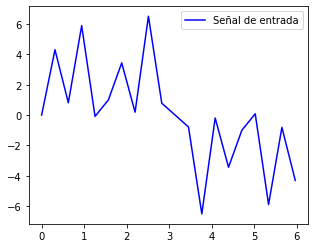

In [69]:
plot_signals()

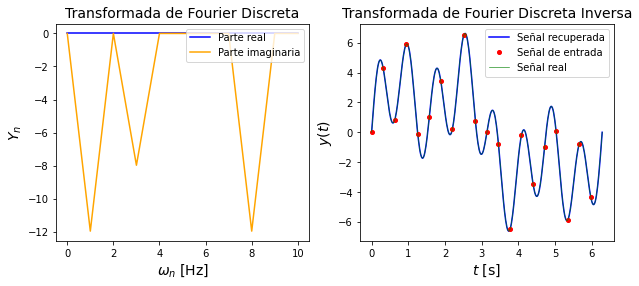

T = 6.28 [s], N = 20.00, entonces s=3.183 [Hz]


In [70]:
plot_transformadas()

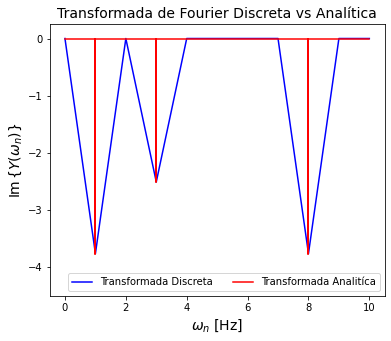

In [71]:
plot_comparison()

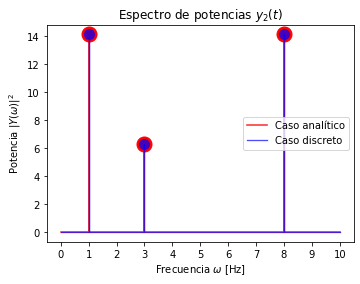

In [72]:
plot_spectrum()

In [21]:
#Señal pura
def yfun(t):
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)
    return yt

#Señal con ruido
def yfun(t):
    np.random.seed(int(t/h))
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)+(np.random.rand()-0.5)*2
    return yt